# MATH 441 Discrete Optimization Problems

## September 13, 2022

* Standard Form
* Resource Allocation
* Feasible Solutions
* Slack Variables and Basic/Nonbasic Variables
* Group Activity!

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

## Standard Form

The **standard form** of a linear optimization problem is:

$$
\begin{array}{rc}
\text{maximize:} & \mathbf{c}^T \mathbf{x} \\
\text{subject to:} & A \mathbf{x} \leq \mathbf{b} \\
& \mathbf{x} \geq 0
\end{array}
$$

where:

* $\mathbf{c} \in \mathbb{R}^n$
* $\mathbf{x} \in \mathbb{R}^n$
* $A$ is a $m \times n$ matrix
* $\mathbf{b} \in \mathbb{R}^m$

Note: vector inequality $\mathbf{u} \leq \mathbf{v}$ means $u_i \leq v_i$ for each $i=1,\dots,n$.

## Resource Allocation

A common problem which translates into a linear optimization problem is **resource allocation**. Suppose a factory manufactures $n$ distinct products using $m$ kinds of materials.

* Let $b_i$ be the amount of available material $i$
* Let $x_j$ be the amount of product $j$ manufactured
* Let $a_{ij}$ be the amount of material $i$ required to manufacture product $j$
* Let $c_j$ be the net revenue per unit of product $j$

The amount $x_1,\dots,x_n$ of each product to manufacture to maximize the net revenue subject to the material constraints is the solution of the linear optimzation problem:

$$
\begin{array}{rc}
\text{maximize:} & c_1x_1 + \cdots + c_nx_n \\
\text{subject to:} & a_{1,1}x_1 + \cdots + a_{1,n}x_n \leq b_1 \\
& a_{2,1}x_1 + \cdots + a_{2,n}x_n \leq b_2 \\
& \vdots \\
& a_{m,1}x_1 + \cdots + a_{m,n}x_n \leq b_m \\
& x_1 \geq 0, \dots , x_n \geq 0
\end{array}
$$

**Exercise.** Find other interesting examples of linear optimization.

* Transportation: move resources through a network
* Matrix games
* Diet problem
    * Also called resource blending
    * Is this the dual of resource allocation?
    * It is (conceptually) the opposite of resource allocation: extract raw materials from products
* Random circles

## Feasible Solutions

* A vector $\mathbf{x} \in \mathbb{R}^n$ is a **feasible solution** if it satisfies the constraints: $A \mathbf{x} \leq \mathbf{b}$ and $\mathbf{x} \geq 0$.
* A feasible solution $\mathbf{x} \in \mathbb{R}^n$ is **optimal** if $\mathbf{c}^T \mathbf{y} \leq \mathbf{c}^T \mathbf{x}$ for all other feasible solutions $\mathbf{y} \in \mathbb{R}^n$.
* A linear optimization problem is **infeasible** if there are no feasible solutions.
* A linear optimization problem is **unbounded** if the set of feasible solutions is unbounded.
* A set $S \subset \mathbb{R}^n$ is **convex** if for all $\mathbf{x},\mathbf{y} \in S$ the line connecting $\mathbf{x}$ and $\mathbf{y}$ is also contained in $S$.
* The set of feasible solutions $S = \{ \mathbf{x} \in \mathbb{R}^n : A \mathbf{x} \leq \mathbf{b} \ , \ \mathbf{x} \geq 0 \}$ is a convex set.
* A **polytope** in $\mathbb{R}^n$ is a bounded set such that the boundary consists of hyperplanes (of dimension n-1).
* A **vertex** of a polytope in $\mathbb{R}^n$ is a point on the boundary which lies in the intersection of $n$ hyperplanes (of dimension n-1) on the boundary.

**Question.** How do you know a problem is infeasible given a random $A$ and $\mathbf{b}$?

* Complementary slackness
* Consider the dual problem

**Question.** How do you know a problem is unbounded given a random $A$ and $\mathbf{b}$?

**Theorem.** The set of feasible solutions of a bounded linear optimization problem is a convex polytope and an optimal solution exists at a vertex.

**Exercise.** Find a proof that makes sense to you!

**Example.** Consider the linear optimization problem defined by

$$
A = \left[ \begin{array}{rr} -1 & 1 \\ 2 & 1 \\ 1 & 0 \end{array} \right]
\hspace{10mm}
\mathbf{b} = \begin{bmatrix} 2 \\ 5 \\ 1 \end{bmatrix}
\hspace{10mm}
\mathbf{c} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}
$$

1. Find the vertices of the convex polytope and plot the set of feasible solutions.
2. Find the optimal solution 

*Solution.* The vertices of the convex polytope are (0,0), (0,2), (1,3), (2,1) and (2,0). Use `plt.fill` to plot the polytope.

In [2]:
np.meshgrid([-0.5, 2.5,], [-0.5, 3.5])

[array([[-0.5,  2.5],
        [-0.5,  2.5]]),
 array([[-0.5, -0.5],
        [ 3.5,  3.5]])]

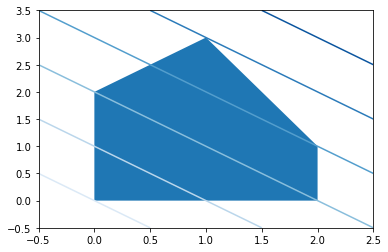

In [3]:
x = [0,0,1,2,2]
y = [0,2,3,1,0]
plt.fill(x,y)
X,Y = np.meshgrid([-0.5,2.5],[-0.5,3.5])
c0 = 1; c1 = 1;
Z = c0*X + c1*Y
plt.contour(X,Y,Z,cmap="Blues")#, plt.colorbar()
plt.axis([-0.5,2.5,-0.5,3.5])
plt.show()

**Question.** Why can't we solve a problem just by finding all vertices of the convex polytope of feasible solutions and testing the objective function at each vertex? Why do we need the simplex method or some other algorithm to solve linear optimization problems?

**Exercise.** Let $A$ be the identity matrix and let $\mathbf{b} = (1,1,1)^T$. Describe all $\mathbf{c} \in \mathbb{R}^3$ such that $(1,1,1)^T$ is an optimal solution of the corresponding linear optimization problem.

**Exercise.** Write a Python program to plot feasible solutions for any problem with $n=2$ decision variables.

## Slack Variables and Basic/Nonbasic Variables

Introduce **slack variables** $w_1,\dots,w_m$ for each inequality constraint:

$$
\begin{array}{rc}
\text{maximize:} & c_1x_1 + \cdots + c_nx_n \\
\text{subject to:} & a_{1,1}x_1 + \cdots + a_{1,n}x_n + w_1 = b_1 \\
& a_{2,1}x_1 + \cdots + a_{2,n}x_n + w_2 = b_2 \\
& \vdots \\
& a_{m,1}x_1 + \cdots + a_{m,n}x_n + w_m = b_m \\
& x_1 \geq 0, \dots , x_n \geq 0, w_1 \geq 0, \dots , w_m \geq 0
\end{array}
$$

* For each $j=1,\dots,n$, the equation $x_j = 0$ defines a hyperplane in $\mathbb{R}^n$
* For each $i=1,\dots,m$, the equation $w_i = 0$ defines the hyperplane $a_{i,1}x_1 + \cdots + a_{i,n}x_n = b_i$ in $\mathbb{R}^n$
* The intersection of $n$ hyperplanes in $\mathbb{R}^n$ on the boundary of the convex polytope of feasible solutions defines a vertex **or** is empty

*What's the point?* An optimal solution exists at a vertex therefore we want to systematically identify vertices:

* Choose any $m$ variables from the list $x_1,\dots,x_n,w_1,\dots,w_m$ and call them **basic variables**
* The remaining $n$ variables are called **nonbasic variables**
* Set all nonbasic variables to 0 and solve for *positive* values of basic variables (if possible)
* The result $\mathbf{x} = (x_1,\dots,x_n)^T$ is a vertex of the convex polytope of feasible solutions

**Example.** Setup the matrix $[A \, I]$ for the example above and solve for basic variables to find all vertices.

In [21]:
A = np.array([[-1,1],[2,1],[1,0]])
b = np.array([[2],[5],[1]])
I = np.eye(3)
T = np.hstack([A,I])
print(T)

[[-1.  1.  1.  0.  0.]
 [ 2.  1.  0.  1.  0.]
 [ 1.  0.  0.  0.  1.]]


The syntax `T[:,indices]` will select the columns of matrix $T$ given a list of column indices. For example, select columns 0, 1 and 2:

In [22]:
T[:,[0,1,2]]

array([[-1.,  1.,  1.],
       [ 2.,  1.,  0.],
       [ 1.,  0.,  0.]])

There are $n=2$ decision variables and $m=3$ constraints therefore there are $n+m \choose m = 5 \choose 3 = 10$ ways to choose $m$ basic variables

In [23]:
basic = [2,3,4]
nonbasic = [0,1]
u = la.solve(T[:,basic],b)
X = np.zeros(5)
X[basic] = u.flatten()
print(X)

[0. 0. 2. 5. 1.]


In [24]:
basic = [1,3,4]
nonbasic = [0,2]
u = la.solve(T[:,basic],b)
X = np.zeros(5)
X[basic] = u.flatten()
print(X)

[0. 2. 0. 3. 1.]


In [25]:
basic = [1,2,4]
nonbasic = [0,3]
u = la.solve(T[:,basic],b)
X = np.zeros(5)
X[basic] = u.flatten()
print(X)

[ 0.  5. -3.  0.  1.]


In [26]:
basic = [0,3,4]
nonbasic = [1,2]
u = la.solve(T[:,basic],b)
X = np.zeros(5)
X[basic] = u.flatten()
print(X)

[-2.  0.  0.  9.  3.]


**Exercise.** Find the remaining vertices.

**Exercise.** Write a Python program to find all vertices of the convex polytope of feasible solutions.

**Exercise.** Write a Python program to find all vertices *and* edges of the convex polytope of feasible solutions *and* plot the polytope in 2D using PCA or some other projection method.

## Group Activity

1. Introduce yourself! What's your name? What year are you in? What's your major?
2. What do you want to do after graduation?
    * Work in industry? Which industry? Finance, health, tech?
    * Go to graduate school? Which reserach area? Statistics? Pure math? Applied math? Computer science?
    * Travel? Where to?
3. What are your interests outside of UBC? Music? Sports? Travel? Art? Cooking?
4. What are your strengths? Math theory? Computer programming? Techincal writing? Data visualization?

In [5]:
def greet():
    return f"Hello {2==2} world"

In [7]:
greet()

'Hello True world'